<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/master/AnalyseTweets_ScatterText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Préparations

Préparations pour le reste du programme (importation, récupération du tableau avec les tweets, ...)

Importation des libraries nécessaires

In [1]:
!pip install --upgrade pandas

In [2]:
import pandas as pd
# import pickle

Liaison au Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 La base de données compte 926.188 tweets et les variables suivantes :

*    user_id : l'identifiant twitter du compte
*     user_screen_name : le nom twitter du compte
*    id_tweet : l'identifiant twitter du tweet
*    created_at : la date à laquelle a été publié le tweet
*     tweet : le tweet
*    retweet_count : le nombre de fois à laquelle le tweet a été retweeté
*     favorite_count : le nombre de fois à laquelle le tweet a été mis en favori
*    liability : la fiabilité du compte twitter (donné par les données decodex)
*    liability_label : le label de la fiabilité du compte twitter
*    description : la description du compte twitter (donné par les données decodex)
*    count_followers : le nombre de followers total du compte twitter

Les données pour analyser : liability, retweet_count, favorite_count, count_followers -> pourcentage de "partage" selon nb followers -> tableau de pourcentage selon fiabilité

Réutiliser tweets pour trouver patterns pour analyser nouveaux tweets (scattertext ?)

Code pour obtenir les données du txt.

In [4]:
import pickle

with open(DATA_PATH+"data_tweets.txt", "rb") as file :  
    data_tweets = pickle.load(file)

data_tweets.head(5)

user_id  ... count_followers
0  78957336  ...           98322
1  78957336  ...           98322
2  78957336  ...           98322
3  78957336  ...           98322
4  78957336  ...           98322

[5 rows x 11 columns]

In [5]:
data_tweets.shape

(926188, 11)

Regroupe par fiabilité pour compter nb user selon la fiabilité

In [6]:
data_tweets.groupby("liability_label").user_screen_name.nunique()

liability_label
site parodique                                              31
site qui diffuse régulièrement de la fausse information     52
site réputé fiable                                         201
site à la fiabilité douteuse                                39
Name: user_screen_name, dtype: int64

In [7]:
data_tweets.groupby("liability_label").id_tweet.nunique()

liability_label
site parodique                                              51506
site qui diffuse régulièrement de la fausse information    133675
site réputé fiable                                         632999
site à la fiabilité douteuse                               108008
Name: id_tweet, dtype: int64

In [8]:
data_tweets.id_tweet.describe()

count                  926188
unique                 926188
top       1466789582213681162
freq                        1
Name: id_tweet, dtype: object

#Scattertext

Blocs pour le scattertext, affichage HTML de l'apparitions des mots selon le groupe de liability.

Objectif actuel : utiliser le corpus créé pour sortir les mots les plus fréquents des 2 groupes (On ne peut pas utiliser l'affichage HTML, on doit obtenir les informations à partir du corpus)

In [9]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 1.1 MB/s 
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=5f625e0c09c80851ae66a496456ca520c94f963af56162f4c35b4560bfc60cfa
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [10]:
import scattertext as st
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French
import numpy as np

On récupère les morceaux du tableau data_tweets qui nous intéresse

In [11]:
# Création des 2 groupes à comparer
notfiables = [2] #Groupe des non fiables
df_notfiables = data_tweets[data_tweets['liability'].isin(notfiables)]
maybefiables = [3] #Groupe peut-être fiable
df_maybefiables = data_tweets[data_tweets['liability'].isin(maybefiables)]
isfiables = [4] #Groupe des fiables
df_isfiables = data_tweets[data_tweets['liability'].isin(isfiables)]

On récupère seulement 6000 tweets (pas besoin de plus), 3000 tweets fiables, 1500 non fiables et 1500 douteux

In [42]:
np.random.default_rng()

#3000 tweets non fiables sélectionnés aléatoirement
remove_n = df_notfiables.shape[0]-3000
drop_indices = np.random.choice(df_notfiables.index, remove_n, replace=False)
df_notfiables = df_notfiables.drop(drop_indices)
#3000 tweets peut-être fiables sélectionnés aléatoirement
remove_n = df_maybefiables.shape[0]-3000
drop_indices = np.random.choice(df_maybefiables.index, remove_n, replace=False)
df_maybefiables = df_maybefiables.drop(drop_indices)
#3000 tweets fiables sélectionnés aléatoirement
remove_n = df_isfiables.shape[0]-3000
drop_indices = np.random.choice(df_isfiables.index, remove_n, replace=False)
df_isfiables = df_isfiables.drop(drop_indices)

In [43]:
df_notfiables

user_id user_screen_name  ...      liability_label count_followers
24       78957336      france_soir  ...  site plutôt douteux           98322
29       78957336      france_soir  ...  site plutôt douteux           98322
99       78957336      france_soir  ...  site plutôt douteux           98322
127      78957336      france_soir  ...  site plutôt douteux           98322
132      78957336      france_soir  ...  site plutôt douteux           98322
...           ...              ...  ...                  ...             ...
881481  368184062      LNParadigme  ...  site plutôt douteux             974
881566  368184062      LNParadigme  ...  site plutôt douteux             974
881568  368184062      LNParadigme  ...  site plutôt douteux             974
881569  368184062      LNParadigme  ...  site plutôt douteux             974
881596  368184062      LNParadigme  ...  site plutôt douteux             974

[3000 rows x 11 columns]

On fait en sorte qu'on puisse séparer le tableau final en 2

In [14]:
df_notfiables['liability'] = 1
df_maybefiables['liability'] = df_notfiables['liability'].iloc[0]
df_isfiables['liability'] = 0
df_notfiables['liability_label'] = 'site plutôt douteux'
df_maybefiables['liability_label'] = df_notfiables['liability_label'].iloc[0]
df_isfiables['liability_label'] = 'site plutôt fiable'

On forme le tableau final (on peut choisir quels tweets confronter)

In [15]:
# df_group = pd.concat([df_notfiables, df_isfiables]) #fausse informations vs fiable
# df_group = pd.concat([df_maybefiables, df_isfiables]) #fiabilité douteuse vs fiable
# df_group = pd.concat([df_notfiables, df_maybefiables]) #fausse informations vs fiabilité douteuse; Attention, dans la suite du programme les noms peuvent sembler bizarre pour cette ligne
df_group = pd.concat([df_notfiables.head(1500), df_maybefiables.head(1500), df_isfiables]) #faux+doute vs fiable

df_group = df_group.drop(columns=['user_id',
                                  'id_tweet',
                                  'created_at',
                                  'retweet_count',
                                  'favorite_count',
                                  'description',
                                  'count_followers'
                                  ]
                         ).reset_index(drop=True)

df_group = df_group[['liability', 
                     'liability_label', 
                     'tweet', 
                     'user_screen_name'
                     ]]

On tokénise les tweets

In [16]:
spacy.cli.download('fr_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [17]:
nlp = spacy.load("fr_core_news_md")

In [18]:
# parse speech text using spaCy
df_group['parsed'] = df_group.tweet.apply(nlp)

On forme le corpus à partir de df_group

In [19]:
# convert dataframe into Scattertext corpus
corpus_group = st.CorpusFromParsedDocuments(df_group, category_col='liability_label', parsed_col='parsed').build()

Affichage HTML du corpus

In [20]:
import IPython

# visualize term associations
html = st.produce_scattertext_explorer(corpus_group,
                                    category='site plutôt fiable',
                                    category_name='site plutôt fiable',
                                    not_category_name='site plutôt douteux',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5
                                    )
file_name = 'terms_pair1.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IPython.display.HTML(filename=file_name)

Création d'un tableau contenant les mots les plus fréquent pour chaque site.

Création d'une liste contenant les X premiers mots considérés comme fiables.

Création d'une liste contenant les X premiers mots considérés comme douteux.

In [21]:
name = corpus_group.get_term_freq_df()

apparitions = pd.concat([corpus_group.get_term_freq_df().sort_values(name.columns[1], ascending=False).drop(columns=name.columns[0]).reset_index().rename(columns={name.columns[1]: "nb utilisation fiable", "term": "mots fiables"}),
                         corpus_group.get_term_freq_df().sort_values(name.columns[0], ascending=False).drop(columns=name.columns[1]).reset_index().rename(columns={name.columns[0] : "nb utilisation douteux", "term": "mots douteux"})],
                         axis=1
                         )

liste_fiables = [x for x in apparitions['mots fiables'].head(10)]
liste_douteux = [x for x in apparitions['mots douteux'].head(10)]
print(liste_fiables)
print(liste_douteux)
apparitions.head(10)

['de', '…', 'la', 'le', '#', 'les', 'à', 'des', 'un', 'et']
['de', '…', '#', 'la', 'le', 'les', 'à', 'des', 'en', 'un']


mots fiables  nb utilisation fiable mots douteux  nb utilisation douteux
0           de                   1687           de                    1505
1            …                   1486            …                    1271
2           la                   1018            #                    1256
3           le                    854           la                    1040
4            #                    817           le                     750
5          les                    717          les                     638
6            à                    708            à                     602
7          des                    508          des                     458
8           un                    505           en                     457
9           et                    499           un                     451

In [22]:
list(set(liste_fiables).intersection(['test', 'ici', 'pour', 'compter', 'le', 'nombre', 'de', 'mots', 'dans', 'nouveau', 'tweet', 'qui', 'indiquent', 'si', 'fiable', 'ou', 'non']))

['de', 'le']

#Tests

Test des variables term_ranker, transform, term_scorer, pmi sur scattertext.

term_ranker : selon les 2 paramètres, les mots les plus utilisés sont pas dans le même ordre, je suppose (avec le nom) que OncePerDocFrequencyRanker veut dire qu'on ne compte les mots qu'une fois par tweet.

transform : a quel point ça prend de l'espace, par défaut ça prend un max, avec dense_rank on force à mettre tous les mots au centre, plus facile de trouver les mots extrêmes. pour scale je sais qu'on peut redéfinir les limites mais je sais pas la forme du vecteur à mettre en paramètre.

term_scorer : je crois qu'on redéfini comment on obtient l'importance d'un mot, mais faut une variable *object* pour faire marcher le truc et j'en ai pas.

pmi_threshold_coefficient : en rapport avec les bigrams, on retire les bigrams dont le PMI n'atteint pas un seuil entier défini. Fonctionne aussi sur les termes pas bigram ?

In [23]:
import IPython

# visualize term associations
html = st.produce_scattertext_explorer(corpus_group,
                                    category='site plutôt fiable',
                                    category_name='site plutôt fiable',
                                    not_category_name='site plutôt douteux',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5
                                    # ,term_ranker=st.OncePerDocFrequencyRanker #None ou st.OncePerDocFrequencyRanker
                                    ,transform=st.Scalers.dense_rank #st.Scalers.percentile_ordinal ou st.Scalers.scale(vect) ou st.Scalers.dense_rank
                                    # ,term_scorer=st.RankDifference() #None ou st.RankDifference(object) mais j'ai pas de object
                                    # , pmi_threshold_coefficient = 2
                                    )
file_name = 'terms_pair1.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IPython.display.HTML(filename=file_name)

#Affichage Boxplot pour analyser visuellement

In [24]:
import seaborn as sns

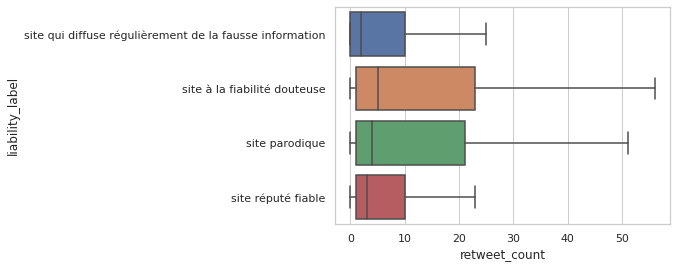

In [25]:
# boxplot
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=data_tweets, x="retweet_count", y="liability_label", showfliers=False)

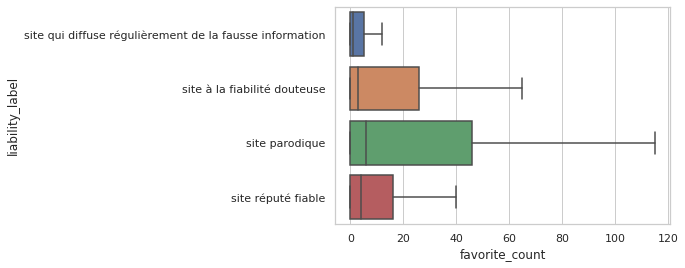

In [26]:
# boxplot
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=data_tweets, x="favorite_count", y="liability_label", showfliers=False)

On crée un autre tableau avec seulement compte, fiabilité, followers, pour comparer les nb de followers

In [27]:
df_comptes = data_tweets.copy()
df_comptes = df_comptes[["user_screen_name", "liability_label","count_followers"]]
df_comptes = df_comptes.drop_duplicates()
len(df_comptes)

323

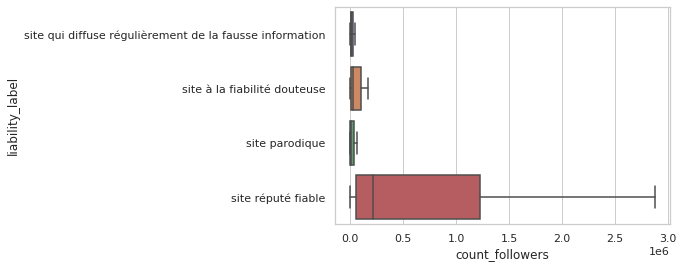

In [28]:
sns.set_theme(style="whitegrid")

aax = sns.boxplot(data=df_comptes, x="count_followers", y="liability_label", showfliers=False)

Ajout de colonnes pour les pourcentage de RT et Like selon le nb de followers de l'user

In [29]:
list_percent_rt = []
list_percent_fav = []
for index, row in data_tweets.iterrows():
  list_percent_rt.append(row['retweet_count']/row['count_followers'])
  list_percent_fav.append(row['favorite_count']/row['count_followers'])
data_tweets['rt_per_followers'] = list_percent_rt
data_tweets['fav_per_followers'] = list_percent_fav
data_tweets.head(10)

user_id user_screen_name  ... rt_per_followers fav_per_followers
0  78957336      france_soir  ...         0.000509          0.001027
1  78957336      france_soir  ...         0.006540          0.000000
2  78957336      france_soir  ...         0.000275          0.000600
3  78957336      france_soir  ...         0.000142          0.000376
4  78957336      france_soir  ...         0.000397          0.000803
5  78957336      france_soir  ...         0.000529          0.001149
6  78957336      france_soir  ...         0.000559          0.001637
7  78957336      france_soir  ...         0.002451          0.005045
8  78957336      france_soir  ...         0.000437          0.001017
9  78957336      france_soir  ...         0.003834          0.005614

[10 rows x 13 columns]

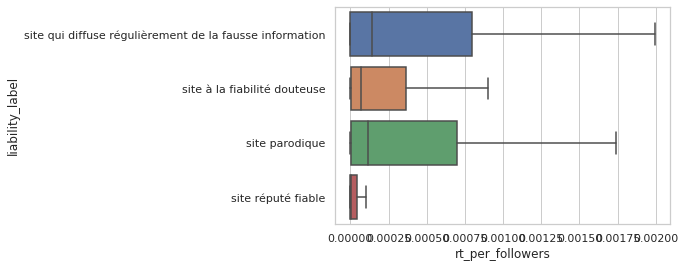

In [30]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=data_tweets, x="rt_per_followers", y="liability_label", showfliers=False)

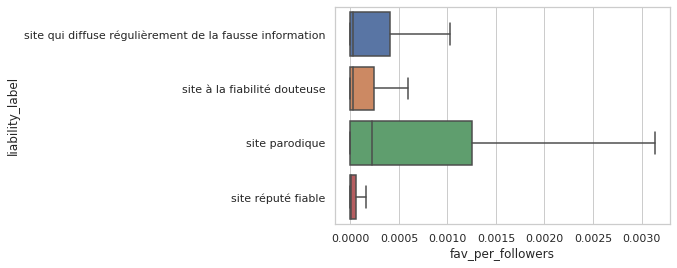

In [31]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=data_tweets, x="fav_per_followers", y="liability_label", showfliers=False)

Utiliser les boxplot pour "catégoriser" et essayer de trouver si on peut déjà séparer certains sites

On va retirer les sites parodiques, peut-être regroupper les non fiable et les douteux 

Avec scatterText, récupère 3000 tweets aléatoirement des 2 catégories restantes et, comme schéma, obtenir un graphique HTML qui trouve les mots propre à chaque catégorie.

Besoin de nettoyer les tweets + retirer les liens + les hashtags + les @s

tokeniser/lemmatiser/autres

#Plein de petites choses (affichage des tweets populaires, nettoyage des tweets, remplacement de termes, ...) 

Fonction de Manon, description dedans

In [32]:
 def print_famous_tweets(df, liability, nb_favorites) :

    ''' Cette fonction permet de sélectionner les tweets qui ont eu le plus de favoris
    pour un user_id donné, et de lire le tweet avec les indicateurs des autres variables de la
    base de données  
    '''

    df_sub = df.loc[(df.liability==liability) & (df.favorite_count > nb_favorites),:]
    for irow in range(df_sub.shape[0]):
        df_row = df_sub.iloc[irow,:]
   
        print(df_row["created_at"])
        print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
        print(df_row["tweet"])
        print("\n")


In [33]:
print_famous_tweets(data_tweets, 4, 50000)

2021-11-06 00:00:03+00:00
favorite_count= 57346 retweet_count=  6140
Marília Mendonça, one of the most popular Brazilian pop singers who was iconic in a type of country music called se… https://t.co/aFYdxp51nZ


2021-01-30 08:18:33+00:00
favorite_count= 50594 retweet_count= 22597
"Un étudiant ne doit pas mourir de faim, se poser des questions sur son loyer. Il doit faire ses études et aller au… https://t.co/VWYlYwbl97


2021-11-30 18:00:05+00:00
favorite_count= 58054 retweet_count= 12145
.@ENHYPEN takes on the ultimate friendship test! These guys have proven that determination, a shared goal, and ligh… https://t.co/RZxyLsH5Cm


2021-11-22 03:59:37+00:00
favorite_count= 65396 retweet_count= 20982
THIS SET IS EVERYTHING #BTS #BTSxAMAs #AMAs https://t.co/igJHUwN6RR


2021-11-22 03:31:24+00:00
favorite_count= 80005 retweet_count= 22082
BTS: *wins artist of the year"
Jin and Jungkook:
#BTS #BTSxAMAs https://t.co/0UR6X36LFv


2021-11-29 15:03:00+00:00
favorite_count= 89752 retweet_count= 216

Vérifier si longueur des tweets permet de catégoriser selon niveau de fiabilité (exemple : les sites fiables font toujours des tweets de plus de 3 "mots")

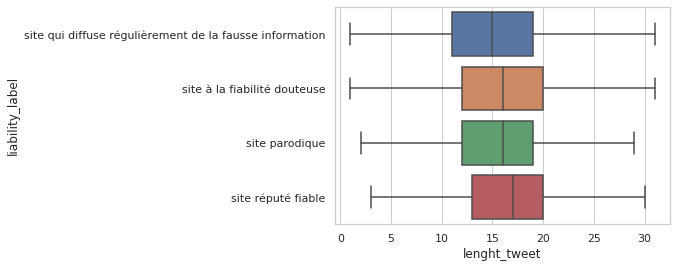

In [34]:
# Calcul d'une variable contenant le nombre de mots de chaque tweets
data_tweets["lenght_tweet"] = data_tweets["tweet"].apply(lambda tweet : len(tweet.split()))

# Calcul de la distribution de la variable pour chaque label
# data_tweets.groupby(["liability_label"]).lenght_tweet.describe()
ax = sns.boxplot(data=data_tweets, x="lenght_tweet", y="liability_label", showfliers=False)

Test de split (sans paramètre, par défault c'est sur l'espace !)

In [35]:
"K. ✍🏻 il.bara | IG https://t.co/qbuaNAPOeD".split()

['K.', '✍🏻', 'il.bara', '|', 'IG', 'https://t.co/qbuaNAPOeD']

Vérifier les tweets de 1 "mot"

In [36]:
data_tweets.loc[data_tweets['lenght_tweet'] == 1, 'tweet']

231       https://t.co/PKeup2vcSq
440       https://t.co/xjlrZptbwS
536                      *Touboul
557       https://t.co/vd57IwKBoC
570       https://t.co/0KyetG1k8u
                   ...           
924809    https://t.co/vrgkb6EHbc
924810    https://t.co/EAIIixZGiw
924811    https://t.co/gw5yUzKsN9
925733    https://t.co/39y0pm1OlZ
926161    https://t.co/VIZXHFZYaV
Name: tweet, Length: 5412, dtype: object

Test pour re.sub

In [37]:
import re

patterns = ['@[a-zA-Z\u00C0-\u00FF0-9]+', '#[a-zA-Z\u00C0-\u00FF0-9]+', '|', 'https://t.co/[a-zA-Z\u00C0-\u00FF0-9]+']

text = "BTS: *wins artist of the year* Jin and Jungkook: #BTS #BTSxAMAs https://t.co/0UR6X36LFv"

for pattern in patterns:
  text = re.sub(pattern,'', text)
  print(text)

# data_tweets['tweet'] = [re.sub(r'','', str(x)) for x in data_df['transcript']]
# text

BTS: *wins artist of the year* Jin and Jungkook: #BTS #BTSxAMAs https://t.co/0UR6X36LFv
BTS: *wins artist of the year* Jin and Jungkook:   https://t.co/0UR6X36LFv
BTS: *wins artist of the year* Jin and Jungkook:   https://t.co/0UR6X36LFv
BTS: *wins artist of the year* Jin and Jungkook:   


Fonctions pour retirer/remplacer du texte dans les tweets afin de les rendre plus facile à "analyser"

remplacement par 'désindentification_'+nom du truc

In [38]:
import re
import string

def remove_spaces(tweet):
  tweet = re.sub('\s{2,}', ' ', tweet)
  return tweet

def replace_stuff(tweet):
  tweet = re.sub('\?', 'point_interrogation', tweet)
  tweet = re.sub('https://t.co/[a-zA-Z\u00C0-\u00FF0-9]+', 'lien_twitter', tweet)
  return tweet

def remove_punctuation(tweet):
  result = "".join([ch for ch in tweet if ch not in string.punctuation.replace('_','')])
  return result

def remove_pattern(tweet):
  patterns = ['\n', '|', '@[a-zA-Z\u00C0-\u00FF0-9]+', '#[a-zA-Z\u00C0-\u00FF0-9]+']
  for pattern in patterns:
    tweet = re.sub(pattern, '', tweet)
  return tweet

def simplification(tweet):
  tweet = replace_stuff(tweet)
  tweet = remove_pattern(tweet)
  tweet = remove_punctuation(tweet)
  tweet = remove_spaces(tweet)
  return tweet

In [39]:
data_tweets["tweet_nettoyé"] = data_tweets["tweet"]

# data_tweets["tweet_nettoyé"] = data_tweets["tweet"].apply(lambda tweet : replace_stuff(tweet)).apply(lambda tweet : remove_pattern(tweet)).apply(lambda tweet : remove_punctuation(tweet)).apply(lambda tweet : remove_spaces(tweet))
data_tweets["tweet_nettoyé"] = data_tweets["tweet"].apply(lambda tweet : simplification(tweet))

In [40]:
# pd.set_option("max_colwidth", 5000)
# data_tweets["tweet"].head()

for tweet in data_tweets["tweet_nettoyé"].head(15):
  print(tweet)

🚨Le professeur Raoult écope d’un blâme de l’Ordre des médecins Article à paraître sur lien_twitter
RT Recours déposé 
🎙BEST OF Pr Michel Drancourt IHU épidémies dhier et daujourdhuiComment la paléomicrobiologie permet dac… lien_twitter
📚 Jonathan Curiel directeur général adjoint des programmes des chaînes M6 W9 et 6ter a publié en octobre 2021 so… lien_twitter
🖍 Le dessin du jourgt à retrouver sur lien_twitter lien_twitter
🐖L214 a annoncé avoir déposé une plainte pour mauvais traitements envers les animaux et tromperie des consommateur… lien_twitter
Au soutien de ce dossier mais aussi audelà il porte une plainte contre X pour RéInfoLiberté et qui… lien_twitter
🎥 Me Heringuez a défendu un couple de restaurateurs qui avait été en garde à vue en février dernier pour avoir reçu… lien_twitter
L’entretien complet lien_twitter
BEST OF 🎙️ En Guadeloupe Me Ellen Bessis et Soumïâa Sayah expliquent les manipulations de la direction des hôpit… lien_twitter
🖍️ Le dessin du jour par lien_twitter
🛂 L

Petit test si je peux éviter de retirer certaines ponctuations

In [41]:
string.punctuation.replace('_','')

'!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'

Il est possible que ce ne soit pas Google Colab/Python/N'importe quel entité qui tronqué les tweets trop long mais en réalité tweepy qui nous a envoyé le tweet tronqué, ou quelquechose comme ça ?